Генерация 5 случайных сигналов...


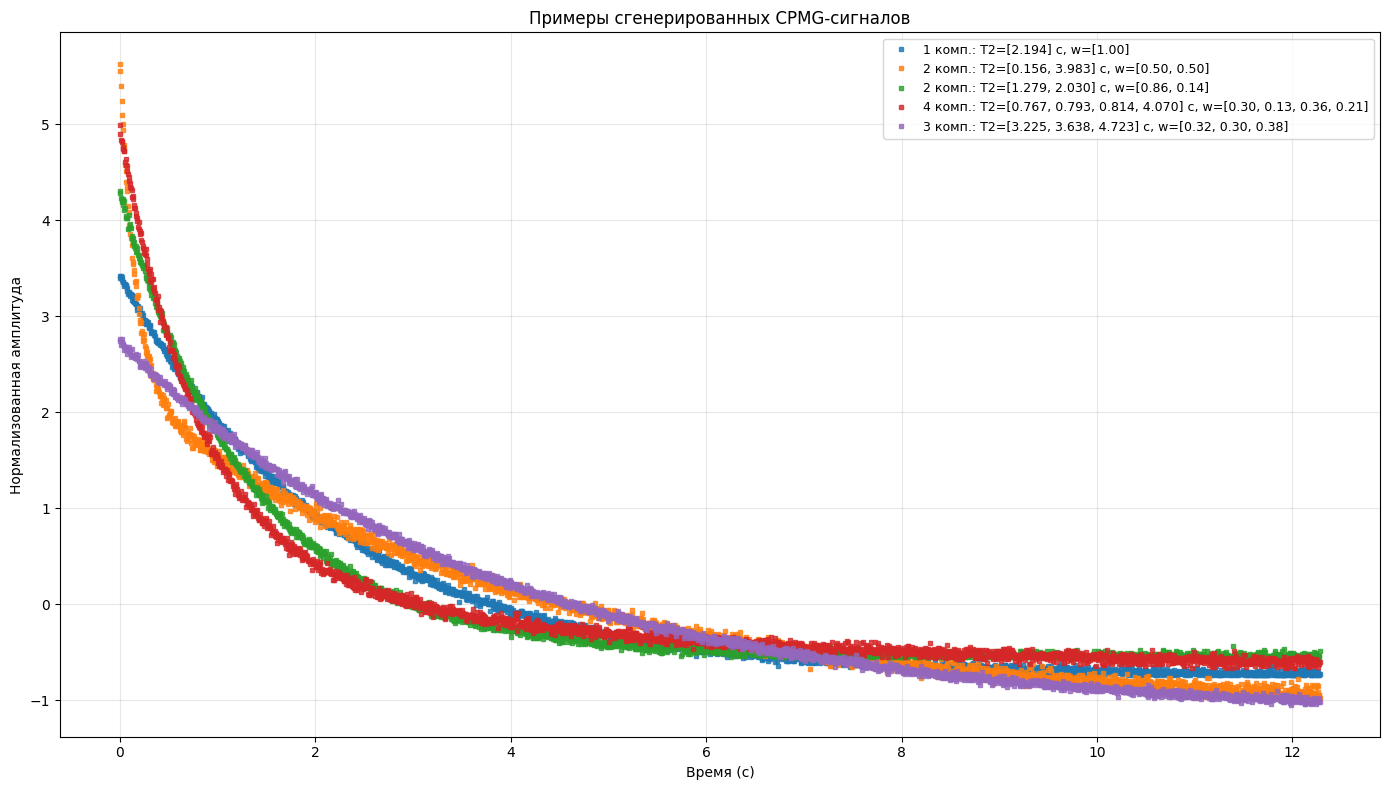

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

# КОНСТАНТЫ И ПАРАМЕТРЫ:
# Параметры модели сигнала полученного методом КПМГ
N_POINTS = 2048   # Длина входного сигнала
T_MAX = 12.282    # Максимальное время (секунды)
NOISE_STD = 0.006 # Стандартное отклонение шума

# Параметры T2
T2_MIN = 0.1      # 0.1 с
T2_MAX = 5.0      # 5.0 с
W_MIN = 0.1       # Минимальная доля w для упрощения задачи

# Фиксированный массив времен
T_ECHOES = np.linspace(0, T_MAX, N_POINTS)
# Диапазон для генерации числа компонент (1, 2, 3 или 4)
N_COMP_RANGE = np.array([1, 2, 3, 4])



# ФУНКЦИЯ ГЕНЕРАЦИИ ОДНОГО СИГНАЛА

def generate_single_sample():
    """
    Генерирует одну случайную модель сигнала, полученного методом КПМГ, и его параметры
    """
    # 1. Выбор числа компонент (1-4, равномерно)
    n_comp = np.random.choice(N_COMP_RANGE)

    # 2. Генерация T2 (Линейное пространство)
    T2 = np.random.uniform(T2_MIN, T2_MAX, n_comp)
    T2.sort() # Сортировка по возрастанию

    # 3. Генерация весов w (доля >= 0.1 взята для упрощения задачи)
    W_RANGE = 1.0 - W_MIN
    w = np.random.uniform(W_MIN, 1.0, n_comp) # Случайные значения >= W_MIN
    w = w / np.sum(w) # Нормализация, чтобы сумма = 1.0

    # 4. Генерация сигнала
    signal = np.zeros(N_POINTS, dtype=np.float32)
    for i in range(n_comp):
        signal += w[i] * np.exp(-T_ECHOES / T2[i])

    # Добавление шума
    signal += np.random.normal(0.0, NOISE_STD, N_POINTS)

    # Защита от нулевых значений
    signal = np.maximum(signal, 1e-10)

    # 5. Нормализация
    signal_norm = signal
    mean = signal_norm.mean()
    std = signal_norm.std() + 1e-8
    signal_normalized = (signal_norm - mean) / std

    # Форматирование метки для вывода
    label = {
        'T2': T2,
        'w': w,
        'n_comp': n_comp
    }

    return signal_normalized, label


# ВИЗУАЛИЗАЦИЯ
NUM_PLOTS = 5
signals_to_plot = []
labels_to_plot = []

print(f"Генерация {NUM_PLOTS} случайных сигналов...")

for i in range(NUM_PLOTS):
    signal, label = generate_single_sample()
    signals_to_plot.append(signal)
    labels_to_plot.append(label)

plt.figure(figsize=(14, 8))

for i in range(NUM_PLOTS):
    signal = signals_to_plot[i]
    label = labels_to_plot[i]

    T2_str = ', '.join([f"{t:.3f}" for t in label['T2']])
    w_str = ', '.join([f"{w:.2f}" for w in label['w']])

    legend_label = f"{label['n_comp']} комп.: T2=[{T2_str}] с, w=[{w_str}]"

    plt.plot(T_ECHOES, signal,
             label=legend_label,
             alpha=0.8,
             marker='s',
             linestyle='',
             markersize=3)

plt.xlabel("Время (с)")
plt.ylabel("Нормализованная амплитуда")
plt.title(f"Примеры сгенерированных CPMG-сигналов")
plt.legend(fontsize=9)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()